In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import norm
import scipy.optimize as opt
import pandas as pd
from matplotlib import cm
%matplotlib inline

## Exercise 4

In [402]:
def obj_function(xy, a=2, b=0, c=4, sigma=0.5):
    x,y, = xy
    log_x = np.where(x>0, np.log(x), -20)
    return x*log_x + y**2 + c * np.exp(-((x-a)**2 + (y-b)**2)/sigma**2)

def grad_f(xy, a=2, b=0, c=4, sigma=0.5):
    x,y, = xy
    log_x = np.where(x>0, np.log(x), -20)
    return np.array([log_x+ 1 - (2*c*(x-a)/sigma**2)*np.exp(-((x-a)**2 + (y-b)**2)/sigma**2),
                     2*y - (2*c*(y-b)/sigma**2)*np.exp(-((x-a)**2 + (y-b)**2)/sigma**2)])

def hessian_f(xy, a=2, b=0, c=4, sigma=0.5):
    x,y, = xy
    return np.array([[1/x - (2*c/sigma**2)*np.exp(-((x-a)**2 + (y-b)**2)/sigma**2) + 4*c**2*(x-a/sigma**2)**2 * np.exp(-((x-a)**2 + (y-b)**2)/sigma**2), 0], 
                     [0, 2 - (2*c/sigma**2)*np.exp(-((x-a)**2 + (y-b)**2)/sigma**2) + 4*c**2*(y-a/sigma**2)**2 * np.exp(-((x-a)**2 + (y-b)**2)/sigma**2)]])

%run "Functions.ipynb"
functions = Functions(obj_function, grad_f, hessian_f)

/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_63845/3142158582.py:3: RuntimeWarning: invalid value encountered in log
  log_x = np.where(x>0, np.log(x), -20)


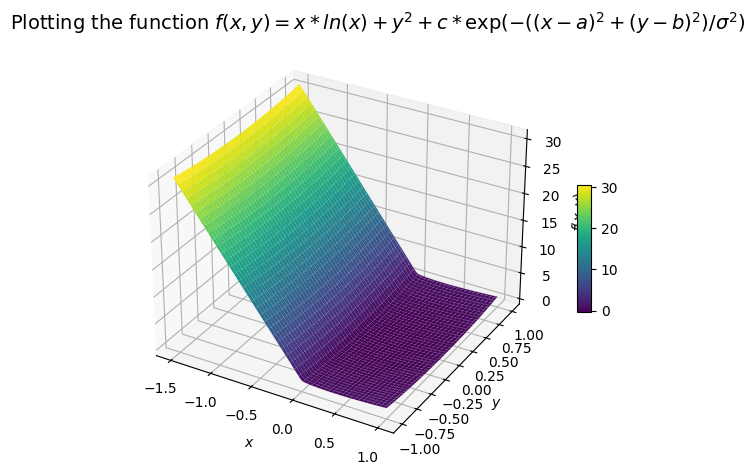

In [337]:
X = np.linspace(-1.5, 1, 100)
Y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(X, Y)
Z = obj_function([X, Y], a=2, b=0, c=4, sigma=0.5)

fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': '3d'})
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title(r'Plotting the function $f(x, y) = x*ln(x) + y^2 + c * \exp(-((x-a)^2 + (y-b)^2)/\sigma^2)$', fontsize=14).set_position([.6, 1.05])
fig.colorbar(surf, shrink=0.3, aspect=9)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$f(x, y)$')
# ax.view_init(elev=20, azim=350)
plt.tight_layout()

Number of iterations: 7
Xmin: [ 3.67429368e-01 -4.73544137e-07]
fMin(z): -0.3677854133263861)


/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_63845/3142158582.py:3: RuntimeWarning: invalid value encountered in log
  log_x = np.where(x>0, np.log(x), -20)
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_63845/3142158582.py:8: RuntimeWarning: invalid value encountered in log
  log_x = np.where(x>0, np.log(x), -20)


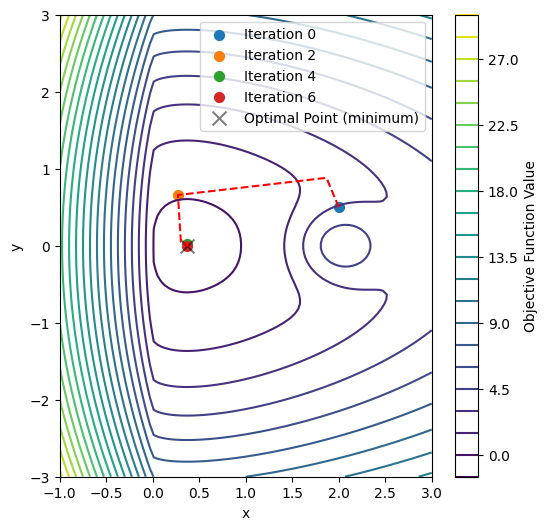

In [348]:
# b) - Fletcher Reeves
x0 = [2, 0.5]
xMin_FR1, fMin_FR1, nIter_FR1, info_FR1 = functions.flecther_reeves(x0=x0, alpha0=0, alpha_max=5, tol=1e-4, maxIter=6, 
                                                            ls ='linesearch', stop_type = 'grad')

print(f'Number of iterations: {nIter_FR1}\nXmin: {xMin_FR1}\nfMin(z): {fMin_FR1})')
cos = []
for co in info_FR1['xs']:
    cos.append([co[0], co[1]])
cos = np.array(cos)

# Create a meshgrid of points at which to evaluate fxy
x = np.linspace(-1, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Evaluate fxy at each point on the grid
Z = obj_function([X, Y])

plt.figure(figsize=(6,6))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis') 
plt.colorbar(contour, label='Objective Function Value')
for i in range(0, len(cos), 2):
    plt.scatter(cos[i,0], cos[i,1], s=50, label=f'Iteration {i}', alpha=1)
plt.plot(cos[:,0],cos[:,1], color='red', linestyle='dashed')
plt.scatter(0.37, 0, color='black',  marker='x', label='Optimal Point (minimum)', alpha=0.5, s=100)
# plt.title(f'Plotting the F-R CG Method for {x0} against contour plot') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# y= 0.00375, x = 3.0590526

Line search stopped because the interval became too small. Returning center of the interval.
Centre: 0.0
Line search stopped because the interval became too small. Returning center of the interval.
Centre: 1.3877787807814457e-16
Line search stopped because the interval became too small. Returning center of the interval.
Centre: 1.3877787807814457e-16
Line search stopped because the interval became too small. Returning center of the interval.
Centre: 1.3877787807814457e-16
Line search stopped because the interval became too small. Returning center of the interval.
Centre: 1.3877787807814457e-16
Line search stopped because the interval became too small. Returning center of the interval.
Centre: 1.3877787807814457e-16
Line search stopped because the interval became too small. Returning center of the interval.
Centre: 1.3877787807814457e-16
Line search stopped because the interval became too small. Returning center of the interval.
Centre: 1.3877787807814457e-16
Number of iterations: 11
Xm

/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_63845/3142158582.py:3: RuntimeWarning: invalid value encountered in log
  log_x = np.where(x>0, np.log(x), -20)
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_63845/3142158582.py:8: RuntimeWarning: invalid value encountered in log
  log_x = np.where(x>0, np.log(x), -20)


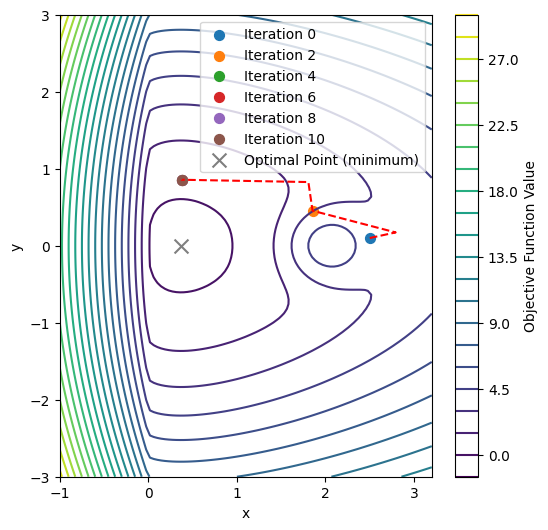

In [349]:
x0 = [2.5, 0.1]
xMin_FR2, fMin_FR2, nIter_FR2, info_FR2 = functions.flecther_reeves(x0=x0, alpha0=0, alpha_max=5, tol=1e-4, maxIter=10, 
                                                            ls ='linesearch', stop_type = 'grad')

print(f'Number of iterations: {nIter_FR2}\nXmin: {xMin_FR2}\nfMin(z): {fMin_FR2})')
cos = []
for co in info_FR2['xs']:
    cos.append([co[0], co[1]])
cos = np.array(cos)

# Create a meshgrid of points at which to evaluate fxy
x = np.linspace(-1, 3.2, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Evaluate fxy at each point on the grid
Z = obj_function([X, Y])

plt.figure(figsize=(6,6))
contour = plt.contour(X, Y, Z, levels=25, cmap='viridis') 
plt.colorbar(contour, label='Objective Function Value')
for i in range(0, len(cos), 2):
    plt.scatter(cos[i,0], cos[i,1], s=50, label=f'Iteration {i}', alpha=1)
plt.plot(cos[:,0],cos[:,1], color='red', linestyle='dashed')
plt.scatter(0.37, 0, color='black', marker='x', label='Optimal Point (minimum)', alpha=0.5, s=100)
# plt.title(f'Plotting the F-R Cong. Gradient Method for {x0} against contour plot') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# y= 0.00375, x = 3.0590526

Line search stopped because the interval became too small. Returning center of the interval.
Centre: -1.1102230246251565e-16
Number of iterations: 7
Xmin: [3.67427352e-01 2.97534221e-08]
fMin(z): -0.367785413321622)


/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_63845/3142158582.py:3: RuntimeWarning: invalid value encountered in log
  log_x = np.where(x>0, np.log(x), -20)


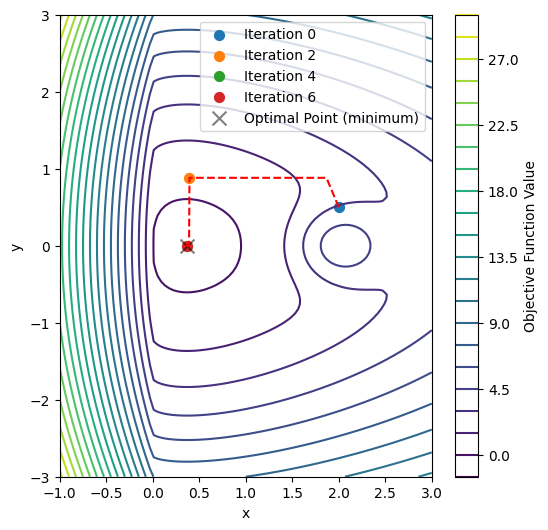

In [388]:
# Polak-Ribiere method
x0 = [2, 0.5]
xMin_PR1, fMin_PR1, nIter_PR1, info_PR1 = functions.polak_ribiereCGmethod(x0=x0, alpha0=0, tol=1e-4, maxIter=10, 
                                                                  ls ='linesearch', alpha_max=1, stop_type = 'grad')

print(f'Number of iterations: {nIter_PR1}\nXmin: {xMin_PR1}\nfMin(z): {fMin_PR1})')
cos = []
for co in info_PR1['xs']:
    cos.append([co[0], co[1]])
cos = np.array(cos)

# Create a meshgrid of points at which to evaluate fxy
x = np.linspace(-1, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Evaluate fxy at each point on the grid
Z = obj_function([X, Y])

plt.figure(figsize=(6,6))
contour = plt.contour(X, Y, Z, levels=25, cmap='viridis') 
plt.colorbar(contour, label='Objective Function Value')
for i in range(0, len(cos), 2):
    plt.scatter(cos[i,0], cos[i,1], s=50, label=f'Iteration {i}', alpha=1)
plt.plot(cos[:,0],cos[:,1], color='red', linestyle='dashed')
plt.scatter(0.37, 0, color='black', marker='x', label='Optimal Point (minimum)', alpha=0.5, s=100)
# plt.title(f'Plotting the P-R Cong. Gradient Method for {x0} against contour plot') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# y= 0.00375, x = 3.0590526

Line search stopped because the interval became too small. Returning center of the interval.
Centre: 0.0
Line search stopped because the interval became too small. Returning center of the interval.
Centre: 0.0
Line search stopped because the interval became too small. Returning center of the interval.
Centre: 1.1102230246251565e-16
Number of iterations: 17
Xmin: [ 3.67429361e-01 -1.27098823e-07]
fMin(z): -0.367785413326596)


/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_63845/3142158582.py:3: RuntimeWarning: invalid value encountered in log
  log_x = np.where(x>0, np.log(x), -20)
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_63845/3142158582.py:8: RuntimeWarning: invalid value encountered in log
  log_x = np.where(x>0, np.log(x), -20)
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_63845/3142158582.py:3: RuntimeWarning: divide by zero encountered in log
  log_x = np.where(x>0, np.log(x), -20)


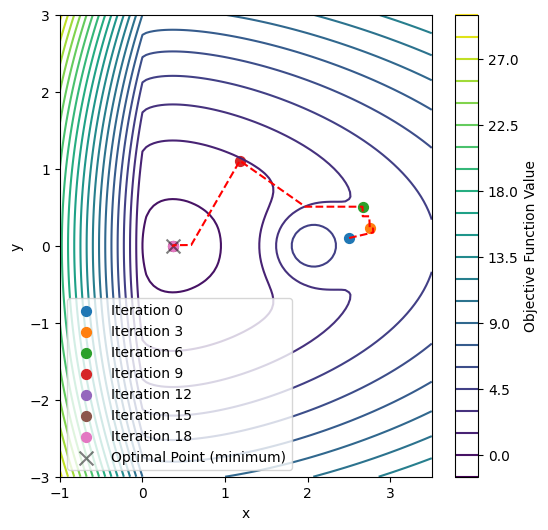

In [389]:
x0 = [2.5, 0.1]
xMin_PR2, fMin_PR2, nIter_PR2, info_PR2 = functions.polak_ribiereCGmethod(x0=x0, alpha0=0, tol=1e-4, maxIter=16, ls ='linesearch', 
                                                                  alpha_max=1, stop_type = 'grad')

print(f'Number of iterations: {nIter_PR2}\nXmin: {xMin_PR2}\nfMin(z): {fMin_PR2})')
cos = []
for co in info_PR2['xs']:
    cos.append([co[0], co[1]])
cos = np.array(cos)

# Create a meshgrid of points at which to evaluate fxy
x = np.linspace(-1, 3.5, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Evaluate fxy at each point on the grid
Z = obj_function([X, Y])

plt.figure(figsize=(6,6))
contour = plt.contour(X, Y, Z, levels=25, cmap='viridis') 
plt.colorbar(contour, label='Objective Function Value')
for i in range(0, len(cos), 3):
    plt.scatter(cos[i,0], cos[i,1], s=50, label=f'Iteration {i}', alpha=1)
plt.scatter(cos[len(cos)-1,0], cos[len(cos)-1,1], s=50, label=f'Iteration {len(cos)}', alpha=1)
plt.plot(cos[:,0],cos[:,1], color='red', linestyle='dashed')
plt.scatter(0.37, 0, color='black', marker='x', label='Optimal Point (minimum)', alpha=0.5, s=100)
# plt.title(f'Plotting the P-R Cong. Gradient Method for {x0} against contour plot') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Number of iterations: 10
Xmin: [ 3.67426740e-01 -2.03567104e-08]
fMin(z): -0.36778541331790593)


/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_63845/3142158582.py:3: RuntimeWarning: invalid value encountered in log
  log_x = np.where(x>0, np.log(x), -20)
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_63845/3142158582.py:8: RuntimeWarning: invalid value encountered in log
  log_x = np.where(x>0, np.log(x), -20)


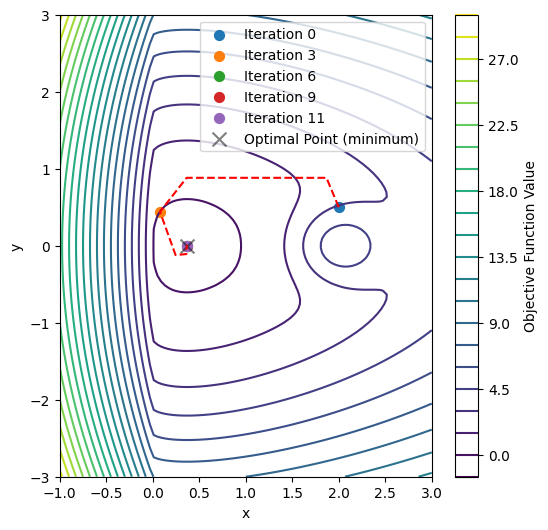

In [354]:
#  d)
x0 = [2, 0.5]
xMin_PR3, fMin_PR3, nIter_PR3, info_PR3 = functions.polak_ribiereCGmethod(x0=x0, alpha0=0, tol=1e-4, maxIter=16, ls ='linesearch', 
                                                                  alpha_max=1, stop_type = 'grad')

print(f'Number of iterations: {nIter_PR3}\nXmin: {xMin_PR3}\nfMin(z): {fMin_PR3})')
cos = []
for co in info_PR3['xs']:
    cos.append([co[0], co[1]])
cos = np.array(cos)

# Create a meshgrid of points at which to evaluate fxy
x = np.linspace(-1, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Evaluate fxy at each point on the grid
Z = obj_function([X, Y])

plt.figure(figsize=(6,6))
contour = plt.contour(X, Y, Z, levels=25, cmap='viridis') 
plt.colorbar(contour, label='Objective Function Value')
for i in range(0, len(cos), 3):
    plt.scatter(cos[i,0], cos[i,1], s=50, label=f'Iteration {i}', alpha=1)
plt.scatter(cos[len(cos)-1,0], cos[len(cos)-1,1], s=50, label=f'Iteration {len(cos)}', alpha=1)
plt.plot(cos[:,0],cos[:,1], color='red', linestyle='dashed')
plt.scatter(0.37, 0, color='black', marker='x', label='Optimal Point (minimum)', alpha=0.5, s=100)
# plt.title(f'Plotting the P-R Cong. Gradient Method for {x0} against contour plot') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Line search stopped because the interval became too small. Returning center of the interval.
Centre: 0.0
Number of iterations: 11
Xmin: [3.6738962e-01 2.0436930e-06]
fMin(z): -0.36778541117168617)


/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_63845/3142158582.py:3: RuntimeWarning: invalid value encountered in log
  log_x = np.where(x>0, np.log(x), -20)
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_63845/3142158582.py:8: RuntimeWarning: invalid value encountered in log
  log_x = np.where(x>0, np.log(x), -20)
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_63845/3142158582.py:3: RuntimeWarning: divide by zero encountered in log
  log_x = np.where(x>0, np.log(x), -20)


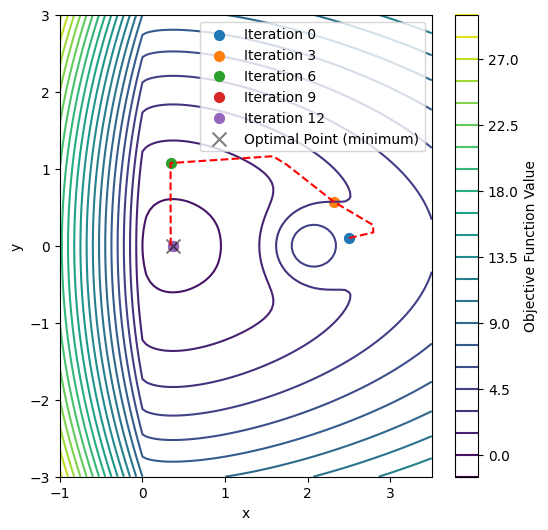

In [355]:
x0 = [2.5, 0.1]
xMin_PR4, fMin_PR4, nIter_PR4, info_PR4 = functions.polak_ribiereCGmethod(x0=x0, alpha0=0, tol=1e-4, maxIter=16, ls ='linesearch', 
                                                                  alpha_max=1, stop_type = 'grad')

print(f'Number of iterations: {nIter_PR4}\nXmin: {xMin_PR4}\nfMin(z): {fMin_PR4})')
cos = []
for co in info_PR4['xs']:
    cos.append([co[0], co[1]])
cos = np.array(cos)

# Create a meshgrid of points at which to evaluate fxy
x = np.linspace(-1, 3.5, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Evaluate fxy at each point on the grid
Z = obj_function([X, Y])

plt.figure(figsize=(6,6))
contour = plt.contour(X, Y, Z, levels=25, cmap='viridis') 
plt.colorbar(contour, label='Objective Function Value')
for i in range(0, len(cos), 3):
    plt.scatter(cos[i,0], cos[i,1], s=50, label=f'Iteration {i}', alpha=1)
plt.scatter(cos[len(cos)-1,0], cos[len(cos)-1,1], s=50, label=f'Iteration {len(cos)}', alpha=1)
plt.plot(cos[:,0],cos[:,1], color='red', linestyle='dashed')
plt.scatter(0.37, 0, color='black', marker='x', label='Optimal Point (minimum)', alpha=0.5, s=100)
# plt.title(f'Plotting the P-R Cong. Gradient Method for {x0} against contour plot') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

Line search stopped because the interval became too small. Returning center of the interval.
Centre: 0.0
Number of iterations: 11
Xmin: [0.89068267 1.01407102]
fMin(z): 0.9257046494267696)


/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_63845/3142158582.py:3: RuntimeWarning: invalid value encountered in log
  log_x = np.where(x>0, np.log(x), -20)
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_63845/3142158582.py:8: RuntimeWarning: invalid value encountered in log
  log_x = np.where(x>0, np.log(x), -20)


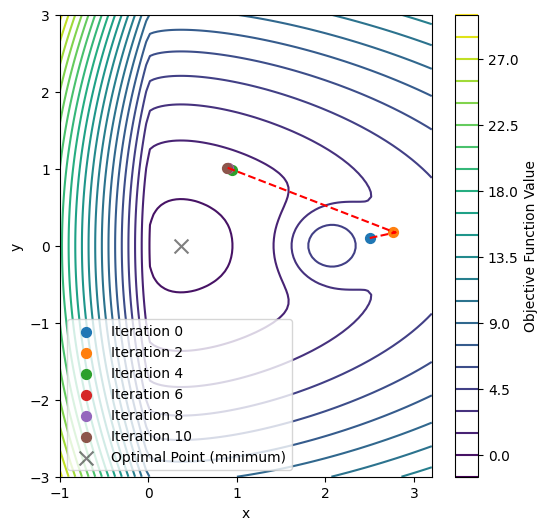

In [356]:
x0 = [2.5, 0.1]
xMin_FR3, fMin_FR3, nIter_FR3, info_FR3 = functions.flecther_reeves(x0=x0, alpha0=0, alpha_max=1, tol=1e-4, maxIter=10, 
                                                            ls ='linesearch', stop_type = 'grad')

print(f'Number of iterations: {nIter_FR3}\nXmin: {xMin_FR3}\nfMin(z): {fMin_FR3})')
cos = []
for co in info_FR3['xs']:
    cos.append([co[0], co[1]])
cos = np.array(cos)

# Create a meshgrid of points at which to evaluate fxy
x = np.linspace(-1, 3.2, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Evaluate fxy at each point on the grid
Z = obj_function([X, Y])

plt.figure(figsize=(6,6))
contour = plt.contour(X, Y, Z, levels=25, cmap='viridis') 
plt.colorbar(contour, label='Objective Function Value')
for i in range(0, len(cos), 2):
    plt.scatter(cos[i,0], cos[i,1], s=50, label=f'Iteration {i}', alpha=1)
plt.plot(cos[:,0],cos[:,1], color='red', linestyle='dashed')
plt.scatter(0.37, 0, color='black', marker='x', label='Optimal Point (minimum)', alpha=0.5, s=100)
# plt.title(f'Plotting the F-R Cong. Gradient Method for {x0} against contour plot') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# y= 0.00375, x = 3.0590526

Number of iterations: 11
Xmin: [1.48903275 1.20869111]
fMin(z): 2.0578374289010504)


/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_63845/3142158582.py:3: RuntimeWarning: invalid value encountered in log
  log_x = np.where(x>0, np.log(x), -20)
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_63845/3142158582.py:8: RuntimeWarning: invalid value encountered in log
  log_x = np.where(x>0, np.log(x), -20)


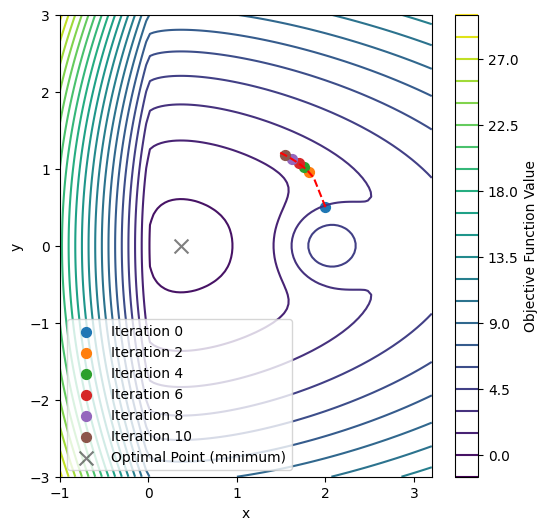

In [357]:
x0 = [2, 0.5]
xMin_FR4, fMin_FR4, nIter_FR4, info_FR4 = functions.flecther_reeves(x0=x0, alpha0=0, alpha_max=1, tol=1e-4, maxIter=10, 
                                                            ls ='linesearch', stop_type = 'grad')

print(f'Number of iterations: {nIter_FR4}\nXmin: {xMin_FR4}\nfMin(z): {fMin_FR4})')
cos = []
for co in info_FR4['xs']:
    cos.append([co[0], co[1]])
cos = np.array(cos)

# Create a meshgrid of points at which to evaluate fxy
x = np.linspace(-1, 3.2, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)

# Evaluate fxy at each point on the grid
Z = obj_function([X, Y])

plt.figure(figsize=(6,6))
contour = plt.contour(X, Y, Z, levels=25, cmap='viridis') 
plt.colorbar(contour, label='Objective Function Value')
for i in range(0, len(cos), 2):
    plt.scatter(cos[i,0], cos[i,1], s=50, label=f'Iteration {i}', alpha=1)
plt.plot(cos[:,0],cos[:,1], color='red', linestyle='dashed')
plt.scatter(0.37, 0, color='black', marker='x', label='Optimal Point (minimum)', alpha=0.5, s=100)
# plt.title(f'Plotting the F-R Cong. Gradient Method for {x0} against contour plot') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# y= 0.00375, x = 3.0590526

### E)

In [358]:
def obj_function(xy, a=2, b=0, c=4, sigma=0.5):
    x,y, = xy
    log_x = np.where(x>0, np.log(x), -20)
    return x*log_x + y**2 + c * np.exp(-((x-a)**2 + (y-b)**2)/sigma**2)

def grad_f(xy, a=2, b=0, c=4, sigma=0.5):
    x,y, = xy
    log_x = np.where(x>0, np.log(x), -20)
    return np.array([log_x+ 1 - (2*c*(x-a)/sigma**2)*np.exp(-((x-a)**2 + (y-b)**2)/sigma**2),
                     2*y - (2*c*(y-b)/sigma**2)*np.exp(-((x-a)**2 + (y-b)**2)/sigma**2)])

def hessian_f(xy, a=2, b=0, c=4, sigma=0.5):
    x,y, = xy
    return np.array([[1/x - (2*c/sigma**2)*np.exp(-((x-a)**2 + (y-b)**2)/sigma**2) + 4*c**2*(x-a/sigma**2)**2 * np.exp(-((x-a)**2 + (y-b)**2)/sigma**2), 0], 
                     [0, 2 - (2*c/sigma**2)*np.exp(-((x-a)**2 + (y-b)**2)/sigma**2) + 4*c**2*(y-a/sigma**2)**2 * np.exp(-((x-a)**2 + (y-b)**2)/sigma**2)]])

In [424]:
xMin = [0.37, 0]
infos = [info_FR1, info_FR2, info_FR3, info_FR4]
x0s = [[2, 0.5], [2.5, 0.1], [2.5, 0.1], [2, 0.5]]
p = 2
conInfos = []
for info, x0 in zip(infos, x0s):
    # convert info['xs'] to numpy array
    arr = np.zeros(shape=(2,len(info['xs'])))
    for i in range(len(info['xs'])):
        x = info['xs'][i][0]
        y = info['xs'][i][1]
        arr[0][i] = x
        arr[1][i] = y
    
    if xMin is None:
        xMin = (arr[0][-1], arr[1][-1])
    
    shape = arr.shape[1]
    if p == 'M':
        p = 2
        if H is not None:
            M = H
        else:
            M = hessian_f(xMin)  # M is the Hessian at the solution, M has to be symmetric positive definite
        
        # Convergence of iterates: || x_k - xMin ||_M
        err = info['xs'] - np.tile(xMin, (2, shape))            
        # err = xs - np.tile(x_min[:, np.newaxis], (1, xs.shape[1]))
        con_x = [np.sqrt(np.dot(err[k].T, M.dot(err[k]))) for k in range(shape)]
    else:
        # Convergence of iterates: || x_k - xMin ||_p
        # print((arr - np.array([xMin[0], xMin[1]]*shape).reshape(2,shape)).shape)
        con_x = np.sum(np.abs(arr - np.array([xMin[0], xMin[1]]*shape).reshape(2,shape))**p, axis=0)**(1/p)

    if obj_function is not None:
        # Convergence of function values: f(x_k) - f(xMin)
        con_f = [obj_function([arr[0,k], arr[1,k]]) - obj_function(xMin) for k in range(shape)]

        # Convergence of gradient: || f(x_k)||_p
        con_df = [np.sum(np.abs(grad_f([arr[0,k], arr[1,k]]))**p)**(1/p) for k in range(shape)]
    else:
        con_f = []
        con_df = []


    conInfo = {'x': con_x, 'f': con_f, 'df': con_df}
    conInfos.append(conInfo)


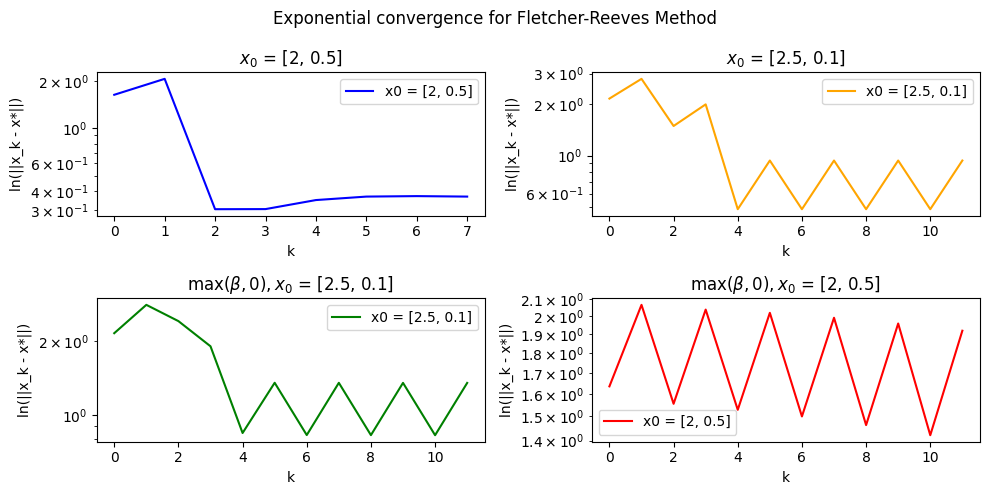

In [426]:
x0s = [[2, 0.5], [2.5, 0.1], [2.5, 0.1], [2, 0.5]]
legends = [r'$x_0$ = [2, 0.5]', r'$x_0$ = [2.5, 0.1]', r'max($\beta, 0), x_0$ = [2.5, 0.1]', r'max($\beta, 0), x_0$ = [2, 0.5]']
colors = ['blue', 'orange', 'green', 'red']
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
fig.suptitle('Exponential convergence for Fletcher-Reeves Method')

infos = 0
for i in range(2):
    for j in range(2):
        axs[i, j].semilogy(conInfos[infos]['x'], label=f'x0 = {x0s[infos]}', color=colors[infos])
        axs[i, j].set_title(legends[infos])
        axs[i, j].legend()
        axs[i, j].set_ylabel('ln(||x_k - x*||)')
        axs[i, j].set_xlabel('k')
        infos += 1
plt.tight_layout()

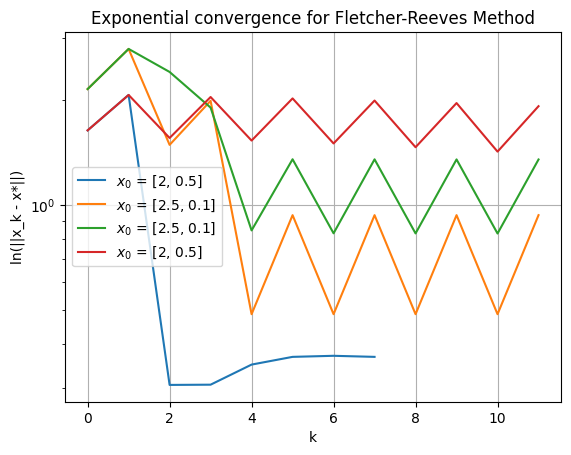

In [373]:
# Exponential convergence - FR
plt.figure()
plt.semilogy(conInfos[0]['x'], label=r'$x_0$ = [2, 0.5]')
plt.semilogy(conInfos[1]['x'], label=r'$x_0$ = [2.5, 0.1]')
plt.semilogy(conInfos[2]['x'], label=r'max($\beta, 0), x_0$ = [2.5, 0.1]')
plt.semilogy(conInfos[3]['x'], label=r'max($\beta, 0), x_0$ = [2, 0.5]')
plt.title('Exponential convergence for Fletcher-Reeves Method')
plt.xlabel('k')
plt.ylabel('ln(||x_k - x*||)')
# plt.xlim(0, len(conInfo['x'])-1)
plt.legend(loc=0)
plt.grid(True)

In [395]:
xMin = [0.37, 0]
infos = [info_PR1, info_PR2, info_PR3, info_PR4]
x0s = [[2, 0.5], [2.5, 0.1], [2, 0.5], [2.5, 0.1]]
p = 2
conInfos = []
for info, x0 in zip(infos, x0s):
    # convert info['xs'] to numpy array
    arr = np.zeros(shape=(2,len(info['xs'])))
    for i in range(len(info['xs'])):
        x = info['xs'][i][0]
        y = info['xs'][i][1]
        arr[0][i] = x
        arr[1][i] = y
    
    if xMin is None:
        xMin = (arr[0][-1], arr[1][-1])
    
    shape = arr.shape[1]
    if p == 'M':
        p = 2
        if H is not None:
            M = H
        else:
            M = hessian_f(xMin)  # M is the Hessian at the solution, M has to be symmetric positive definite
        
        # Convergence of iterates: || x_k - xMin ||_M
        err = info['xs'] - np.tile(xMin, (2, shape))            
        # err = xs - np.tile(x_min[:, np.newaxis], (1, xs.shape[1]))
        con_x = [np.sqrt(np.dot(err[k].T, M.dot(err[k]))) for k in range(shape)]
    else:
        # Convergence of iterates: || x_k - xMin ||_p
        # print((arr - np.array([xMin[0], xMin[1]]*shape).reshape(2,shape)).shape)
        con_x = np.sum(np.abs(arr - np.array([xMin[0], xMin[1]]*shape).reshape(2,shape))**p, axis=0)**(1/p)

    if obj_function is not None:
        # Convergence of function values: f(x_k) - f(xMin)
        con_f = [obj_function([arr[0,k], arr[1,k]]) - obj_function(xMin) for k in range(shape)]

        # Convergence of gradient: || f(x_k)||_p
        con_df = [np.sum(np.abs(grad_f([arr[0,k], arr[1,k]]))**p)**(1/p) for k in range(shape)]
    else:
        con_f = []
        con_df = []


    conInfo = {'x': con_x, 'f': con_f, 'df': con_df}
    conInfos.append(conInfo)

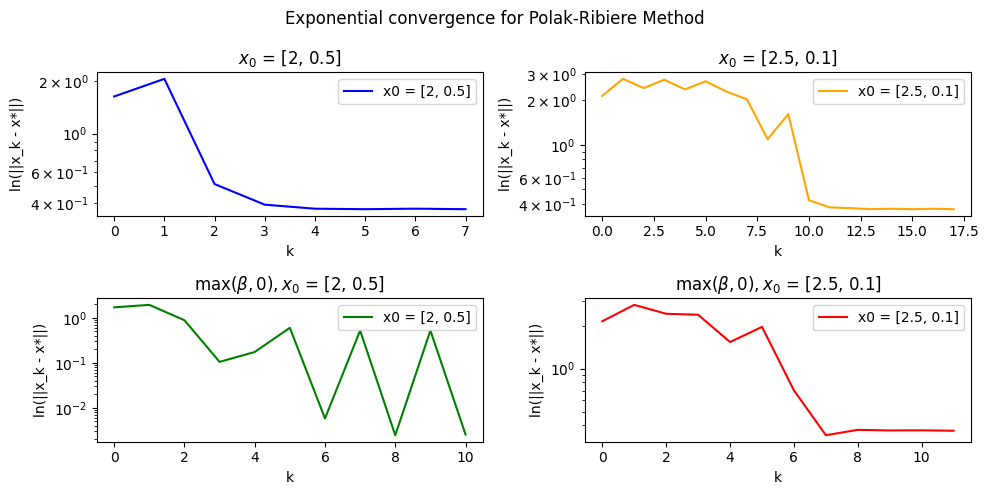

In [421]:
x0s = [[2, 0.5], [2.5, 0.1], [2, 0.5], [2.5, 0.1]]
legends = [r'$x_0$ = [2, 0.5]', r'$x_0$ = [2.5, 0.1]', r'max($\beta, 0), x_0$ = [2, 0.5]', r'max($\beta, 0), x_0$ = [2.5, 0.1]']
colors = ['blue', 'orange', 'green', 'red']
fig, axs = plt.subplots(2, 2, figsize=(10, 5))
fig.suptitle('Exponential convergence for Polak-Ribiere Method')

infos = 0
for i in range(2):
    for j in range(2):
        axs[i, j].semilogy(conInfos[infos]['x'], label=f'x0 = {x0s[infos]}', color=colors[infos])
        axs[i, j].set_title(legends[infos])
        axs[i, j].legend()
        axs[i, j].set_ylabel('ln(||x_k - x*||)')
        axs[i, j].set_xlabel('k')
        infos += 1
plt.tight_layout()

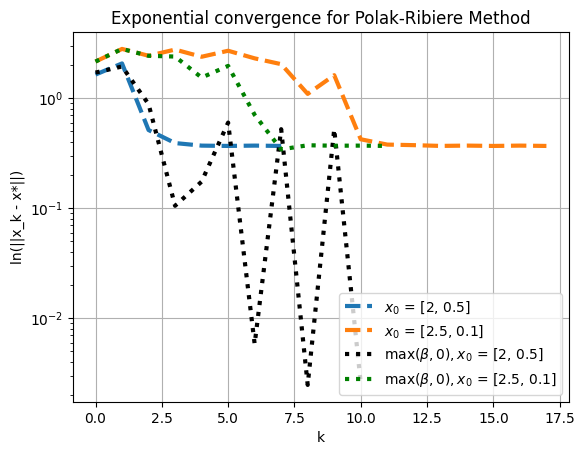

In [396]:
# Exponential convergence - PR
# functions.convergence_history(info=info_PR4, xMin=[0.37,0], x0=[2,0.5], p=2, H=None, plot_type='Exp_convergence')
plt.figure()
plt.semilogy(conInfos[0]['x'], ls='--', lw=3, label=r'$x_0$ = [2, 0.5]')
plt.semilogy(conInfos[1]['x'], ls='--', lw=3, label=r'$x_0$ = [2.5, 0.1]')
plt.semilogy(conInfos[2]['x'], c='black', ls=':', lw=3, label=r'max($\beta, 0), x_0$ = [2, 0.5]')
plt.semilogy(conInfos[3]['x'], c='green', ls=':', lw=3, label=r'max($\beta, 0), x_0$ = [2.5, 0.1]')
plt.title('Exponential convergence for Polak-Ribiere Method')
plt.xlabel('k')
plt.ylabel('ln(||x_k - x*||)')
# plt.xlim(0, len(conInfo['x'])-1)
plt.legend(loc=4)
plt.grid(True)

In [427]:
# hessian must be positive definite for newton be well behaved
one = hessian_f([0.37,0])

one_e = np.linalg.eig(one)[0]

print(one_e)

[2.79223401 2.09850214]


## Exercise 5

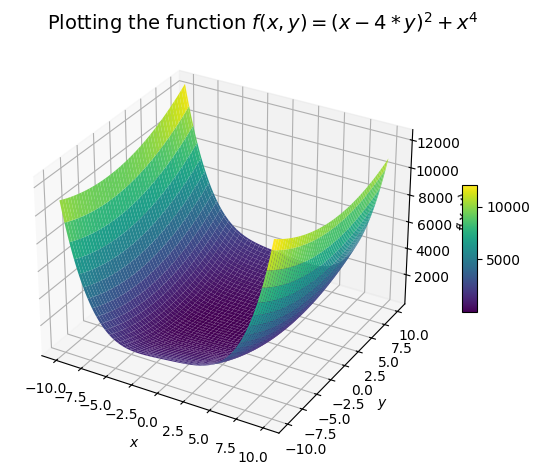

In [472]:
# b)
def obj_function(xy):
    x,y, = xy
    return (x-4*y)**2 + x**4

def grad_f(xy):
    x,y, = xy
    return np.array([2*(x-4*y) + 4*x**3, -8*(x-4*y)])

def hessian_f(xy):
    x,y, = xy
    return np.array([[2 + 12*x**2, -8],
                     [-8, 32]])

%run "Functions.ipynb"
functions = Functions(obj_function, grad_f, hessian_f)

X = np.linspace(-10, 10, 100)
Y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(X, Y)
Z = obj_function([X, Y])

fig, ax = plt.subplots(nrows=1, ncols=1, subplot_kw={'projection': '3d'})
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title(r'Plotting the function $f(x, y) = (x-4*y)^2 + x^4$', fontsize=14).set_position([.6, 1.05])
fig.colorbar(surf, shrink=0.3, aspect=9)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$f(x, y)$')
plt.tight_layout()

Number of iterations: 11
Xmin: [-0.01510046  0.04729636]
fMin(z): 0.041732789084410575)


/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_63845/2726110160.py:8: RuntimeWarning: overflow encountered in scalar multiply
  return np.array([2*(x-4*y) + 4*x**3, -8*(x-4*y)])


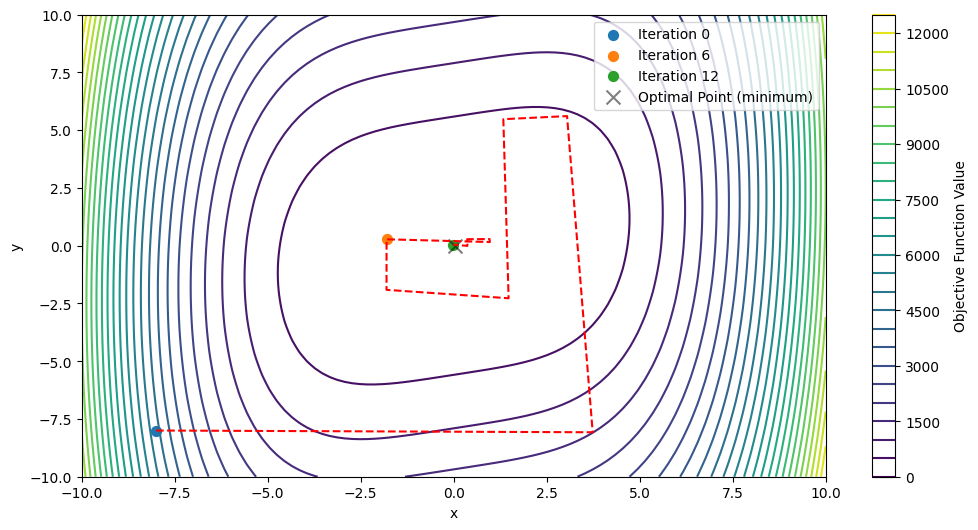

In [506]:
# Initialisation for line search
# alpha0 = 0
# alphamax = 1
# c1 = 1e-4
# c2 = 0.9
# tol = 1e-4
# max_iter = 100

x0 = [-8,-8]
xMin, fMin, nIter, info = functions.BFGS_alg(x0=x0, alpha0=0, tol=1e-4, maxIter=10, ls='linesearch',
                                             stop_type = 'grad', alpha_max=1)

print(f'Number of iterations: {nIter}\nXmin: {xMin}\nfMin(z): {fMin})')
cos = []
for co in info['xs']:
    cos.append([co[0], co[1]])
cos = np.array(cos)

# Create a meshgrid of points at which to evaluate fxy
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)

# Evaluate fxy at each point on the grid
Z = obj_function([X, Y])

plt.figure(figsize=(12,6))
contour = plt.contour(X, Y, Z, levels=25, cmap='viridis') 
plt.colorbar(contour, label='Objective Function Value')
for i in range(0, len(cos), 6):
    plt.scatter(cos[i,0], cos[i,1], s=50, label=f'Iteration {i}', alpha=1)
plt.scatter(cos[len(cos)-1,0], cos[len(cos)-1,1], s=50, label=f'Iteration {len(cos)}', alpha=1)
plt.plot(cos[:,0],cos[:,1], color='red', linestyle='dashed')
plt.scatter(0.027, 0.006, color='black', marker='x',label='Optimal Point (minimum)', alpha=0.5, s=100)
# plt.title(f'Plotting the BFGS Method for {x0} against contour plot') 
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

ABOVE IS CLOSE BUT NOT MINIMUM

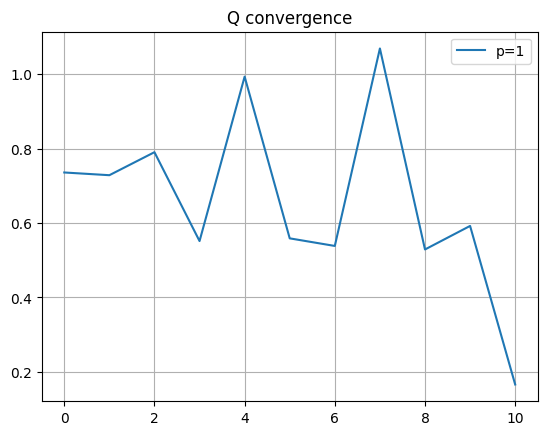

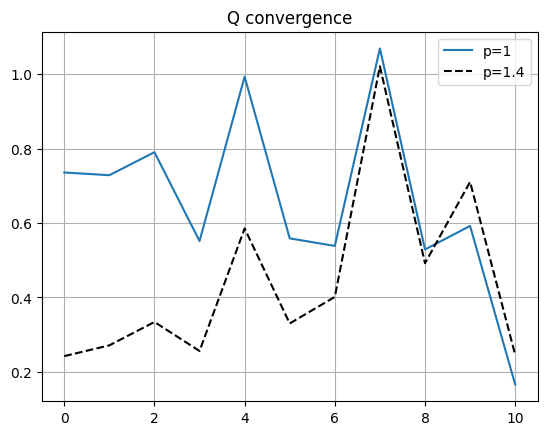

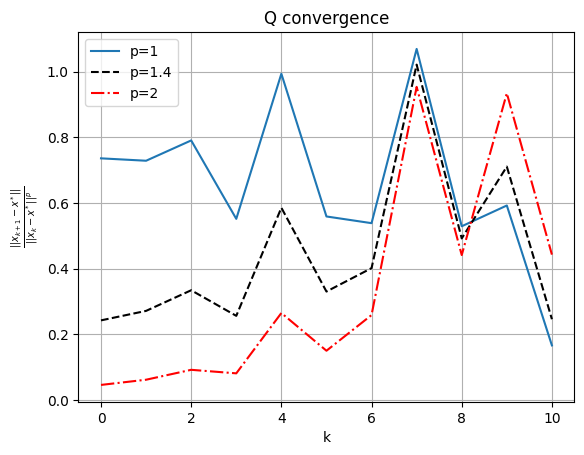

In [507]:
# c)
functions.convergence_history(info=info, xMin=[0.027, 0.006], x0=[-8,-8], p=1, H=None, plot_type='Q-convergence')